In [28]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Popcorn

temperature at level -1 and 1 or 160 and 200

kernal type at level -1 and 1 or white and yellow

the outcome is continuous response of y=52, 74, 62, 80 numbers of popcorn kernals popped

Let's explore a couple of ways of creating the countour plot.

In [30]:
T_pc=np.array([-1,1])
K_pc=np.array([-1,1])
Y_pc=np.array([52,74,62,80])

meshgrid to create factor 1 and 2 2x2 matrix; create 1 respsone 2x2 matrix

the Standard order has the firts factor changing most, then the second factor

In [31]:
[X_pc, X1_pc] = np.meshgrid(T_pc,K_pc)
[X_pc, X1_pc] 

[array([[-1,  1],
        [-1,  1]]),
 array([[-1, -1],
        [ 1,  1]])]

In [32]:
Z_pc = Y_pc.reshape(2,2)
Z_pc

array([[52, 74],
       [62, 80]])

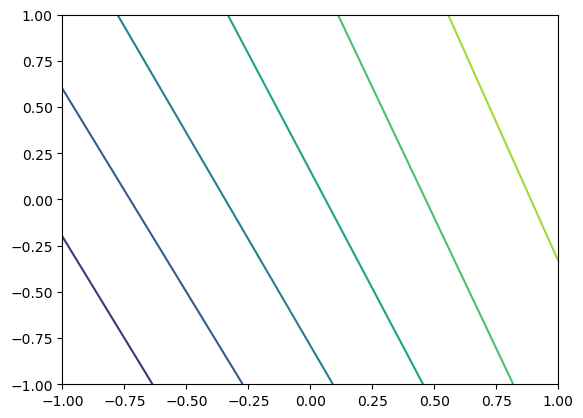

In [33]:
# Creating 2-D grid of features
[X_pc, X1_pc] = np.meshgrid(T_pc,K_pc)
  
fig, ax = plt.subplots(1, 1)
  
Z_pc = Y_pc.reshape(2,2)
  
# plots contour lines
ax.contour(X_pc, X1_pc, Z_pc)

another countour plot

In [34]:
T_pc=np.array([160,200])
K_pc=np.array([-1,1])
Y_pc=np.array([52,74,62,80])

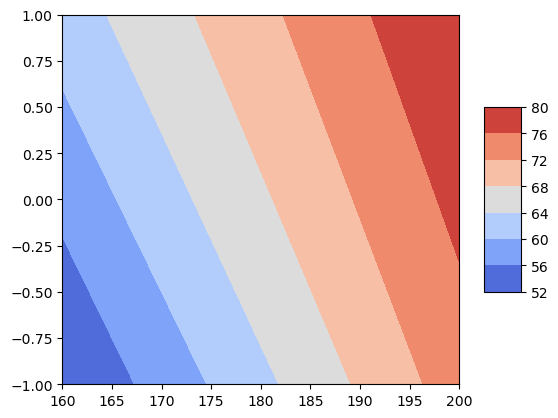

In [35]:
[X_pc, X1_pc] = np.meshgrid(T_pc,K_pc)
  
fig, ax = plt.subplots(1, 1)
  
Z_pc = Y_pc.reshape(2,2)
  
# plots contour lines
contourPC=ax.contourf(X_pc, X1_pc, Z_pc,cmap="coolwarm")
fig.colorbar(contourPC,shrink=0.5,aspect=5)

Surface Plot

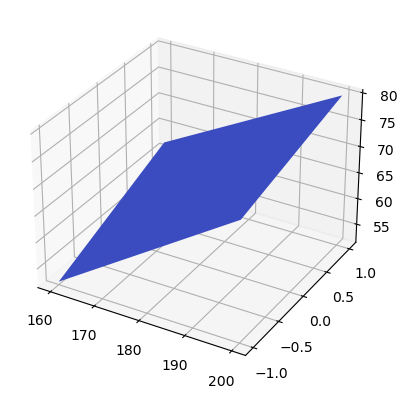

In [36]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surfPC = ax.plot_surface(X_pc, X1_pc, Z_pc,cmap="coolwarm")

To show another surface plot, first fit a statsmodel ols model of number of kernels popped on temperature and type of kernel.

In [37]:
T_pcA=pd.Series([160,200,160,200],name="Temp")
K_pcA=pd.Series([-1,-1,1,1],name="Kernel")
P_pcA=pd.Series([52,74,62,80],name="Popped")
DF_pcA=pd.concat([T_pcA,K_pcA,P_pcA],axis='columns')
print(DF_pcA)

   Temp  Kernel  Popped
0   160      -1      52
1   200      -1      74
2   160       1      62
3   200       1      80


In [38]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model_pcA=ols('P_pcA~T_pcA+K_pcA+T_pcA*K_pcA',data=DF_pcA)
results_pcA=model_pcA.fit()

Text(0.5, 0.5, 'Kernel')

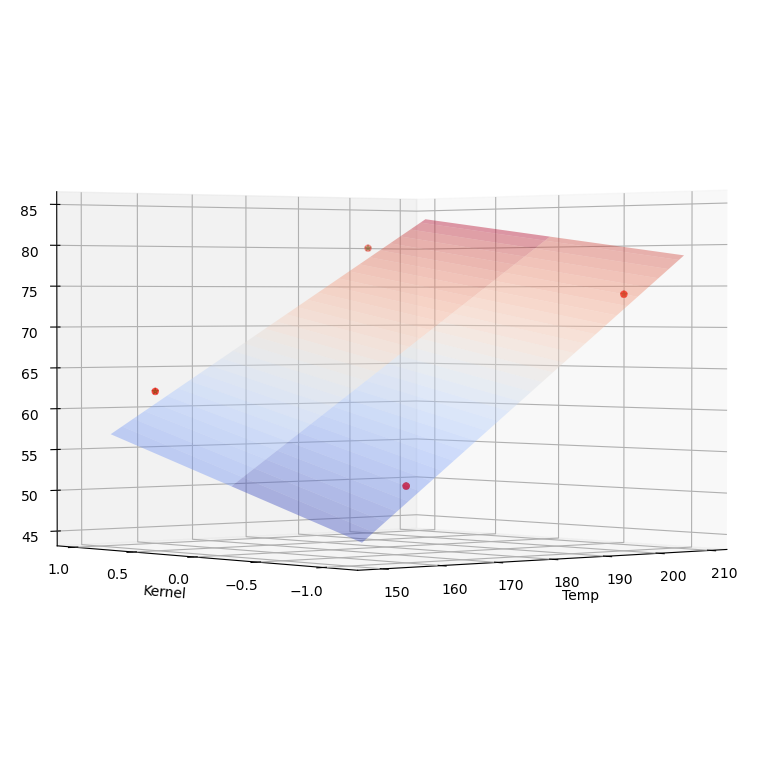

In [39]:
fig=plt.figure(figsize=plt.figaspect(1)*2)
ax=fig.add_subplot(111,projection='3d')

df = DF_pcA
x = df["Temp"]
y= df["Kernel"]
z = df["Popped"]

x1,x2,x3=model_pcA.exog_names[1:]

#x_surf=np.arange(df["Temp"].min(), df["Temp"].max())
x_surf=np.arange(150,210)
y_surf=np.arange(-1.1,1.1)
#y_surf=np.arange(df["Kernel"].min(), df["Kernel"].max())
xS,yS=np.meshgrid(x_surf,y_surf)

exog=pd.DataFrame({x1: xS.ravel(), x2:yS.ravel()})
zS=results_pcA.predict(exog=exog).values.reshape(xS.shape)
ax.plot_surface(xS,yS,zS,alpha=0.4,cmap='coolwarm')

ax.scatter(x,y,z,marker='*',color="g",label="Raw Data")
ax.view_init(elev=1,azim=230)

ax.scatter(x.values,y.values,results_pcA.fittedvalues.values,label="Fited Values",color="r")

plt.xlabel("Temp")
plt.ylabel("Kernel")

Text(0, 0.5, 'Kernel')

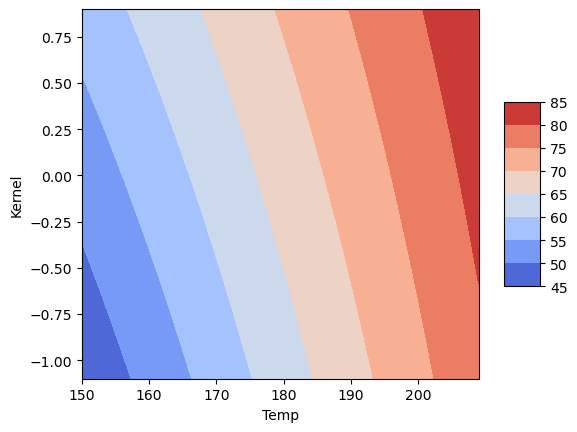

In [40]:
fig, ax = plt.subplots(1, 1)

contour_pcA=ax.contourf(xS,yS,zS,cmap="coolwarm")
fig.colorbar(contour_pcA,shrink=0.5,aspect=5)
plt.xlabel("Temp")
plt.ylabel("Kernel")

Fit the ols model based on the factors coded for -1 and 1

In [41]:
T_pc1=pd.Series([-1,1,-1,1],name='Temp')
K_pc1=pd.Series([-1,-1,1,1], name='Kernel')
P_pc1=pd.Series([52,74,62,80],name='Popped')

In [42]:
DF_pc=pd.concat([T_pc1,K_pc1,P_pc1],axis='columns')
print(DF_pc)

   Temp  Kernel  Popped
0    -1      -1      52
1     1      -1      74
2    -1       1      62
3     1       1      80


In [43]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model_pc=ols('P_pc1~T_pc1+K_pc1+T_pc1*K_pc1',data=DF_pc)
results_pc=model_pc.fit()
print(results_pc.summary2())

               Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     nan 
Dependent Variable: P_pc1            AIC:                -inf
Date:               2022-11-16 15:14 BIC:                -inf
No. Observations:   4                Log-Likelihood:     inf 
Df Model:           3                F-statistic:        nan 
Df Residuals:       0                Prob (F-statistic): nan 
R-squared:          1.000            Scale:              nan 
--------------------------------------------------------------
                  Coef.   Std.Err.   t   P>|t|  [0.025  0.975]
--------------------------------------------------------------
Intercept        67.0000       nan  nan    nan     nan     nan
T_pc1            10.0000       nan  nan    nan     nan     nan
K_pc1             4.0000       nan  nan    nan     nan     nan
T_pc1:K_pc1      -1.0000       nan  nan    nan     nan     nan
-------------------------------------------------------------
Omnibus:        

C:\Users\carol\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:50: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: invalid value encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in doub

Explore Interactions with a factor plot

<AxesSubplot:xlabel='Kernel', ylabel='Popped'>

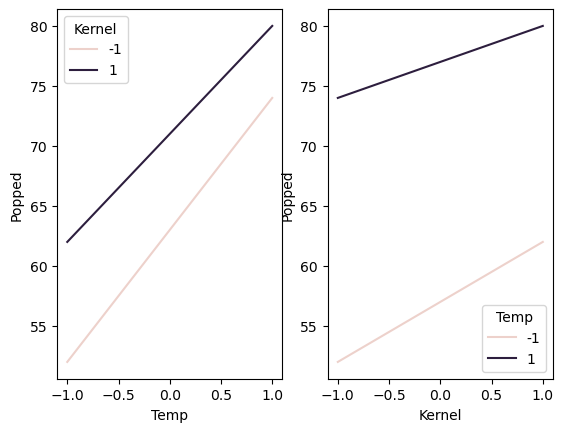

In [44]:
# factorplot, catplot
fig, ax =plt.subplots(1,2,sharex=True)
sns.lineplot(x="Temp",y="Popped",hue="Kernel",data=DF_pc,ax=ax[0])
sns.lineplot(x="Kernel",y="Popped",hue="Temp",data=DF_pc, ax=ax[1])

# Matrix OLS

OLS model 

y = b0+bTXT+BKXK+BTKXTXK + e

b = ((X transpose X) inverse))) * (X transpose Y)

In [45]:
DF_pc

,Temp,Kernel,Popped
0,-1,-1,52
1,1,-1,74
2,-1,1,62
3,1,1,80


In [46]:
Int=np.array([1,1,1,1])
T_pc2=np.array([-1,1,-1,1])
K_pc2=np.array([-1,-1,1,1])
TK_pc2=np.array([1,-1,-1,1])
P_pc2=np.array([52,74,62,80])

In [47]:
XMatrix=np.array([[1,-1,-1,1],[1,1,-1,-1],[1,-1,1,-1],[1,1,1,1]])
XMatrix

array([[ 1, -1, -1,  1],
       [ 1,  1, -1, -1],
       [ 1, -1,  1, -1],
       [ 1,  1,  1,  1]])

In [48]:
Y=P_pc2
Y

array([52, 74, 62, 80])

In [49]:
# X transpose

XMatrix.T

array([[ 1,  1,  1,  1],
       [-1,  1, -1,  1],
       [-1, -1,  1,  1],
       [ 1, -1, -1,  1]])

In [50]:
# X transpose X
XMatrix.T.dot(XMatrix)

array([[4, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 4, 0],
       [0, 0, 0, 4]])

In [51]:
# X transpose Y
(XMatrix.T).dot(Y)

array([268,  40,  16,  -4])

In [52]:
# inverse X transpose X
np.linalg.inv(XMatrix.T.dot(XMatrix))

array([[0.25, 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.25, 0.  ],
       [0.  , 0.  , 0.  , 0.25]])

In [53]:
# multiply inverse X transpose X with X transpose Y
(np.linalg.inv(XMatrix.T.dot(XMatrix))).dot(XMatrix.T).dot(Y)

array([67., 10.,  4., -1.])

In [54]:
# DOE 2 lecture example
XMatrix=np.array([[1,-1,-1,1],[1,1,-1,-1],[1,-1,1,-1],[1,1,1,1]])
Y=np.array([69,60,64,53])
(np.linalg.inv(XMatrix.T.dot(XMatrix))).dot(XMatrix.T).dot(Y)

array([61.5, -5. , -3. , -0.5])

# Two Levels and 3 Factors: Full Factorials: Wastewater Example

In [55]:
C_ww=pd.Series([-1,1,-1,1,-1,+1,-1,+1],name='Chemical')
T_ww=pd.Series([-1,-1,1,1,-1,-1,1,1], name='Temp')
S_ww=pd.Series([-1,-1,-1,-1,1,1,1,1],name='Stirring')
O_ww=pd.Series([5,30,6,33,4,3,5,4],name='Outcome')

In [56]:
DF_ww=pd.concat([C_ww,T_ww,S_ww,O_ww],axis='columns')
print(DF_ww)

   Chemical  Temp  Stirring  Outcome
0        -1    -1        -1        5
1         1    -1        -1       30
2        -1     1        -1        6
3         1     1        -1       33
4        -1    -1         1        4
5         1    -1         1        3
6        -1     1         1        5
7         1     1         1        4


In [57]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

model_ww=ols('O_ww~C_ww*T_ww*S_ww',data=DF_ww)
results_ww=model_ww.fit()
print(results_ww.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     nan      
Dependent Variable: O_ww             AIC:                -482.1177
Date:               2022-11-16 15:15 BIC:                -481.4822
No. Observations:   8                Log-Likelihood:     249.06   
Df Model:           7                F-statistic:        nan      
Df Residuals:       0                Prob (F-statistic): nan      
R-squared:          1.000            Scale:              inf      
-------------------------------------------------------------------
                   Coef.   Std.Err.     t     P>|t|  [0.025  0.975]
-------------------------------------------------------------------
Intercept         11.2500       inf   0.0000    nan     nan     nan
C_ww               6.2500       inf   0.0000    nan     nan     nan
T_ww               0.7500       inf   0.0000    nan     nan     nan
C_ww:T_ww          0.2500       inf   0.0000    nan     nan     nan
S_ww  

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)


# Four Factors at 2 Levels

ce=collection efficiency model

ed=energy delivery model

In [58]:
A=pd.Series([-1,1,-1,1,-1,+1,-1,+1,-1,1,-1,1,-1,+1,-1,+1])
B=pd.Series([-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1])
C=pd.Series([-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,1,1])
D=pd.Series([-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1])
y=pd.Series([43.5,51.3,35,38.4,44.9,52.4,39.7,41.3,41.3,50.2,37.5,39.2,43,51.9,39.9,41.6])

In [59]:
DF_ce=pd.concat([A,B,C,D,y],axis='columns')
print(DF_ce)

    0  1  2  3     4
0  -1 -1 -1 -1  43.5
1   1 -1 -1 -1  51.3
2  -1  1 -1 -1  35.0
3   1  1 -1 -1  38.4
4  -1 -1  1 -1  44.9
5   1 -1  1 -1  52.4
6  -1  1  1 -1  39.7
7   1  1  1 -1  41.3
8  -1 -1 -1  1  41.3
9   1 -1 -1  1  50.2
10 -1  1 -1  1  37.5
11  1  1 -1  1  39.2
12 -1 -1  1  1  43.0
13  1 -1  1  1  51.9
14 -1  1  1  1  39.9
15  1  1  1  1  41.6


In [60]:
model_ce=ols('y~A*B*C*D',data=DF_ce)
results_ce=model_ce.fit()
print(results_ce.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     nan      
Dependent Variable: y                AIC:                -923.4443
Date:               2022-11-16 15:15 BIC:                -911.0829
No. Observations:   16               Log-Likelihood:     477.72   
Df Model:           15               F-statistic:        nan      
Df Residuals:       0                Prob (F-statistic): nan      
R-squared:          1.000            Scale:              inf      
--------------------------------------------------------------------
               Coef.    Std.Err.      t      P>|t|   [0.025   0.975]
--------------------------------------------------------------------
Intercept     43.1938        inf    0.0000     nan      nan      nan
A              2.5938        inf    0.0000     nan      nan      nan
B             -4.1188        inf   -0.0000     nan      nan      nan
A:B           -1.5438        inf   -0.0000     nan      nan      nan

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\base\model.py:1512: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constan

# Re-fitting and gaining DF for standard error estimates

In [61]:
A=pd.Series([-1,1,-1,1,-1,+1,-1,+1,-1,1,-1,1,-1,+1,-1,+1])
B=pd.Series([-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1])
C=pd.Series([-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,1,1])
D=pd.Series([-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1])
y=pd.Series([82,83.7,61.7,100,82.1,84.1,67.7,100,82,86.3,66,100,82.2,89.8,68.6,100])

In [62]:
DF_ed=pd.concat([A,B,C,D,y],axis='columns')
print(DF_ed)

    0  1  2  3      4
0  -1 -1 -1 -1   82.0
1   1 -1 -1 -1   83.7
2  -1  1 -1 -1   61.7
3   1  1 -1 -1  100.0
4  -1 -1  1 -1   82.1
5   1 -1  1 -1   84.1
6  -1  1  1 -1   67.7
7   1  1  1 -1  100.0
8  -1 -1 -1  1   82.0
9   1 -1 -1  1   86.3
10 -1  1 -1  1   66.0
11  1  1 -1  1  100.0
12 -1 -1  1  1   82.2
13  1 -1  1  1   89.8
14 -1  1  1  1   68.6
15  1  1  1  1  100.0


In [63]:
model_ed=ols('y~A*B*C*D',data=DF_ed)
results_ed=model_ed.fit()
print(results_ed.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     nan      
Dependent Variable: y                AIC:                -907.3939
Date:               2022-11-16 15:15 BIC:                -895.0325
No. Observations:   16               Log-Likelihood:     469.70   
Df Model:           15               F-statistic:        nan      
Df Residuals:       0                Prob (F-statistic): nan      
R-squared:          1.000            Scale:              inf      
--------------------------------------------------------------------
               Coef.    Std.Err.      t      P>|t|   [0.025   0.975]
--------------------------------------------------------------------
Intercept     83.5125        inf    0.0000     nan      nan      nan
A              9.4750        inf    0.0000     nan      nan      nan
B             -0.5125        inf   -0.0000     nan      nan      nan
A:B            7.5250        inf    0.0000     nan      nan      nan

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\base\model.py:1512: RuntimeWarning: invalid value encountered in multiply
  cov_p = self.normalized_cov_params * scale
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\carol\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constan

In [64]:
model_ed_AB=ols('y~A*B',data=DF_ed)
results_ed_AB=model_ed_AB.fit()
print(results_ed_AB.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.973   
Dependent Variable: y                AIC:                72.1394 
Date:               2022-11-16 15:15 BIC:                75.2298 
No. Observations:   16               Log-Likelihood:     -32.070 
Df Model:           3                F-statistic:        181.9   
Df Residuals:       12               Prob (F-statistic): 2.88e-10
R-squared:          0.978            Scale:              4.2996  
------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept    83.5125    0.5184  161.1010  0.0000  82.3830  84.6420
A             9.4750    0.5184   18.2779  0.0000   8.3455  10.6045
B            -0.5125    0.5184   -0.9886  0.3424  -1.6420   0.6170
A:B           7.5250    0.5184   14.5162  0.0000   6.3955   8.6545
--------------------

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
